# <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Project | Movie Reviews Classification(Part 1)</p>

<div style="border-radius:10px; padding: 15px; background-color: #E3F2FD; font-size:120%; text-align:left">
  
## Table of Contents

1. [Introduction](#introduction)
2. [Data Overview](#data-overview)
3. [Data Preprocessing](#data-preprocessing)
4. [Model Development](#model-development)
     - [Classical Machine Learning Models](#classical-models)
         - [Logistic regression with Bag of Words (BoW)](#logistic-regression-bow)
         - [SVM with BoW](#svm-bow)
         - [Naive Bayes with BoW](#naive-bayes-bow)
         - [Logistic regression with Term Frequency-Inverse Document Frequency (TF-IDF)](#logistic-regression-tfidf)
         - [SVM with TF-IDF](#svm-tfidf)
         - [Naive Bayes with TF-IDF](#naive-bayes-tfidf)
     - [Deep Learning Models](#deep-learning-models)
         - [Bidirectional RNNs](#rnn)
         - [LSTMs](#lstm)
         - [GRUs](#gru)
5. [Results and Analysis](#results-and-analysis)
   - [Classical Machine Learning Model](#ml-model)
   - [Deep Learning Model](#dl-model)
6. [Conclusion](#conclusion)

</div>

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [9]:
#use to fix to words like isn't to is not
!pip install contractions

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">1. Introduction</p><a id="introduction"></a>

Sentiment analysis, also known as opinion mining, is a pivotal technique in Natural Language Processing (NLP) that aims to identify and extract the sentiment or emotional tone conveyed within a text. This process has become increasingly important for businesses and organizations seeking to gauge customer feedback, enhance user experience, and make informed decisions based on textual data.

### Project Overview

This project presents a comprehensive exploration of sentiment analysis by comparing classical machine learning models with deep learning architectures, using the IMDB dataset containing 50,000 movie reviews. The primary objective is to evaluate the effectiveness of various models in classifying text as positive or negative sentiments.

Key components of the project include:

- **Text Preprocessing Techniques**: Implementing steps such as removing HTML tags, URLs, punctuation, and emojis, translating Gen Z slang, and performing text normalization. Different preprocessing pipelines were used for classical and deep learning models, with additional steps like stopword removal and lemmatization.
  
- **Classical Machine Learning Models**: Applying Logistic Regression, SVM, and Naive Bayes using Bag of Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF) features, and analyzing their performance.

- **Deep Learning Models**: Implementing Bidirectional RNNs, LSTMs, and GRUs to capture the sequential nature of the text and comparing their effectiveness against classical approaches.

- **Transformer-Based Models**: Utilizing the BERT (Bidirectional Encoder Representations from Transformers) model in a separate notebook to explore its state-of-the-art capabilities in NLP and compare it with other approaches.

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### Objectives

The primary goals of this project are to:

1. **Perform Text Preprocessing**: Develop and apply robust text preprocessing pipelines tailored to both classical and deep learning models.
   
2. **Evaluate Classical Models**: Assess the performance of Logistic Regression, SVM, and Naive Bayes with different feature representations like BoW and TF-IDF.
   
3. **Implement Deep Learning Models**: Design and train Bidirectional RNN, LSTM, and GRU models, focusing on their ability to capture and utilize sequential dependencies in text.

4. **Fine-tune Transformer Models**: Apply and evaluate the BERT model, understanding its advanced capabilities in sentiment analysis.

5. **Conduct Model Comparison**: Analyze and compare the results of classical, deep learning, and transformer-based models to identify their strengths and weaknesses across various metrics.

### Significance

The findings from this project will provide valuable insights into the performance trade-offs between classical machine learning models, deep learning architectures, and modern transformer-based models. Understanding these trade-offs is crucial for selecting the most appropriate model based on specific use cases, computational resources, and accuracy requirements.

By the conclusion of this study, we aim to have a detailed understanding of how different sentiment analysis techniques perform, paving the way for more informed decisions in future NLP tasks.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from keras import backend as K
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import tensorflow_hub as hub
import warnings

warnings.filterwarnings('ignore')


<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">2. Data Overview</p><a id="data-overview"></a>

The IMDB dataset contains 50,000 movie reviews, specifically curated for natural language processing (NLP) and text analytics tasks. This dataset is designed for binary sentiment classification and offers a significant amount of data compared to previous benchmarks.

**Dataset Overview:**
- **Training Set:** 25,000 movie reviews
- **Testing Set:** 25,000 movie reviews

In [11]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

Initial Exploration and Display the First Few Row

In [12]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

The dataset consists of movie reviews paired with corresponding sentiment labels (`positive` or `negative`). Each review is a text entry, and the sentiment indicates whether the review is favorable or unfavorable, making this dataset suitable for training and evaluating sentiment analysis models.

In [13]:
# Check the size of the dataset
print("Dataset size:", df.size)

# Check the shape of the dataset
print("Dataset shape:", df.shape)

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

Dataset size: 100000
Dataset shape: (50000, 2)
Number of duplicate rows: 418


In [14]:
df.shape

(49582, 2)

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

Features and Target variable

In [15]:
# Features and target variable
X = df['review']
y = df['sentiment']

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

Distribution of sentiment classes

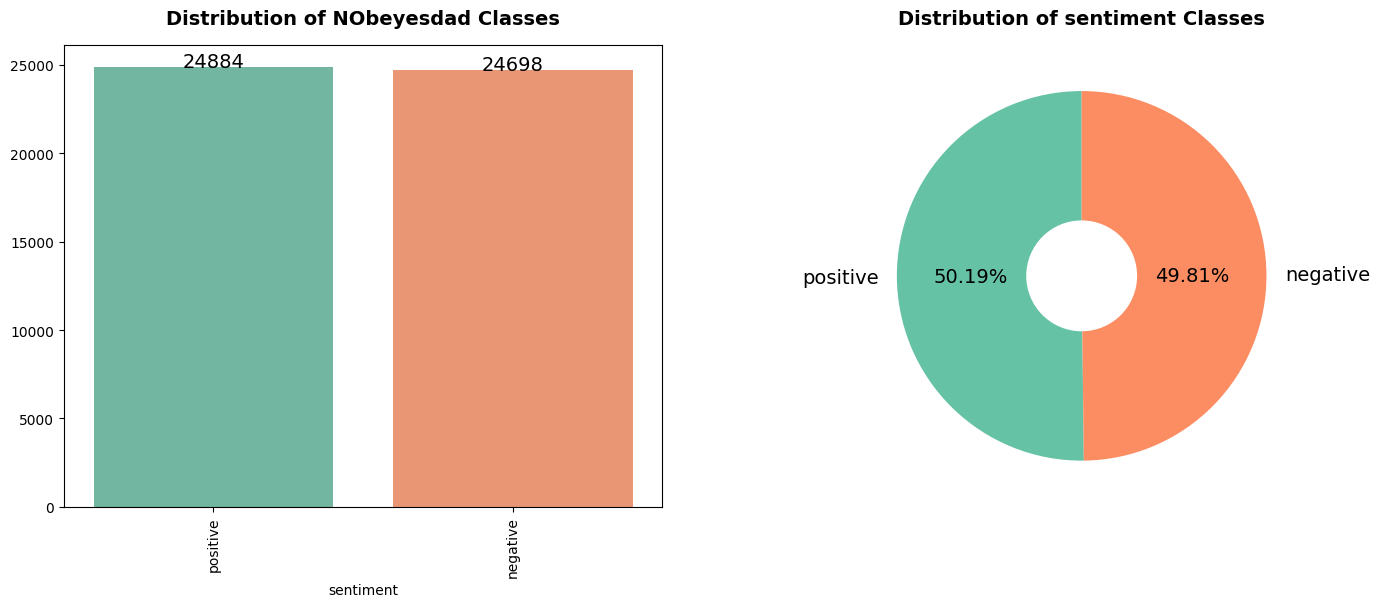

In [16]:
import seaborn as sns
classes = ['positive','negative']

plt.figure(figsize=(17, 6))
plt.subplot(1, 2, 1)
sentiment_counts = df["sentiment"].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2', order=classes)
plt.title("Distribution of NObeyesdad Classes", fontweight="black", size=14, pad=15)
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v, v, ha="center", fontsize=14)
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
colors = sns.color_palette('Set2', len(classes))
plt.pie(sentiment_counts, labels=classes, autopct="%.2f%%", textprops={"size": 14},
        colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Distribution of sentiment Classes", fontweight="black", size=14, pad=15)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">3. Data Preprocessing</p><a id="data-preprocessing"></a>

   - **Remove Tags, URLs, Punctuation, and Emojis:** These functions clean the text by removing HTML tags, URLs, punctuation, and emojis, respectively.
   - **Gen Z Translation Dictionary:** A dictionary is used to translate Gen Z slang and abbreviations into their full forms.
   - **Text Normalization:** Combines the removal of tags, URLs, punctuation, emojis, and translation of Gen Z slang into one function.
   - **Text Preprocessing for Classical Models:** Further removes stopwords from the text, which is useful for traditional machine learning models.
   - **Text Preprocessing for Deep Learning Models:** Adds lemmatization using SpaCy after the classical preprocessing steps. This is tailored for deep learning models to get more normalized text.

**Additional Functions:**
   - **Tokenization:** Splits text into individual words using `word_tokenize`.
   - **Expand Contractions:** Expands common contractions to their full forms.
   - **Lemmatization Using SpaCy:** Uses SpaCy to lemmatize text, which reduces words to their base or root form.

**Summary**
1. **Text Cleaning:**
   - The code cleans text data by removing unnecessary elements such as HTML tags, URLs, punctuation, and emojis, which helps in reducing noise in the text data.

2. **Normalization and Translation:**
   - Normalization is enhanced with the translation of Gen Z slang, making the text more readable and standardized for processing.
   - Contractions are expanded to ensure consistency in text representation.

3. **Text Preprocessing for Machine Learning Models:**
   - For classical models, the code removes stopwords and performs general cleaning.
   - For deep learning models, additional lemmatization is performed using SpaCy to ensure that the text is in its root form, which helps in understanding the underlying meaning of words.

4. **Tokenization and Lemmatization:**
   - Tokenization splits text into tokens for further analysis or feeding into models.
   - Lemmatization is applied to reduce words to their base forms, which is useful for both feature extraction and model training.

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">3.1 Data Preprocessing Pipeline</p>

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer
import contractions
import spacy
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.data.path.append("/kaggle/working/")
nltk.download('stopwords')
nltk.download('punkt')
from textblob import Word
import nltk
nltk.download('wordnet')

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Preprocessing functions for all models
def remove_tags(raw_text):
    return re.sub(re.compile('<.*?>'), '', raw_text)

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Gen Z translation dictionary
genz_dict = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "LOL": "Laughing out loud",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "IDC": "I don’t care",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "LMAO": "Laughing my a** off",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing",
}

# Text normalization
def translate_genz(text):
    return ' '.join([genz_dict.get(word, word) for word in text.split()])

# Stopwords and lemmatizer for deep learning preprocessing
sw_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# General Preprocessing Function
def preprocess_text_common(text):
    text = remove_tags(text)
    text = remove_urls(text)
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_emojis(text)
    text = translate_genz(text)
    return text

# Preprocessing specific for classical models
def preprocess_text_classical(text):
    text = preprocess_text_common(text)
    text = ' '.join([word for word in text.split() if word not in sw_list])
    return text

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def lemmatize_text_spacy(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

def preprocess_text_deep_learning(text):
    text = preprocess_text_classical(text)
    text = lemmatize_text_spacy(text)
    return text

# Tokenization
def do_tokenization(text):
    token_words = word_tokenize(text)
    return token_words

# Expand Contractions
def expand_contractions(text):
    return contractions.fix(text)

# Lemmatization using SpaCy
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# Apply the common preprocessing steps
df['review'] = df['review'].apply(expand_contractions)

In [19]:
# Classical Model Preprocessing
df_classical = df.copy()
df_classical['review'] = df_classical['review'].apply(preprocess_text_classical)

In [20]:
# Deep Learning Model Preprocessing
df_dl = df.copy()
df_dl['review'] = df_dl['review'].apply(preprocess_text_deep_learning)

In [21]:
# Separate Features and Labels
X_classical = df_classical['review']
X_dl = df_dl['review']
y = df['sentiment']

In [22]:
# Encode Labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [23]:
# Train-Test Split
X_train_classical, X_test_classical, y_train, y_test = train_test_split(X_classical, y, test_size=0.2, random_state=1)
X_train_dl, X_test_dl, y_train, y_test = train_test_split(X_dl, y, test_size=0.2, random_state=1)

In [24]:
# Check the shapes of the training and testing sets
print("Training set shape:", X_train_classical.shape)
print("Testing set shape:", X_test_classical.shape)

Training set shape: (39665,)
Testing set shape: (9917,)


<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">3.2 Bag of Words (BoW)</p>
    
The Bag of Words (BoW) representation is significant in text analysis because it transforms textual data into numerical format, allowing machine learning models to process it. In BoW, each unique word in the dataset becomes a feature, and its value represents the frequency of that word in a given document. This method captures the presence or absence of words but not their order, making it a simple yet powerful approach for text classification tasks. The sparsity of the resulting matrix (with many zeros) can be efficiently handled by models, making BoW a foundational technique in natural language processing.

In [25]:
# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform the training data
X_train_bow = cv.fit_transform(X_train_classical)

# Transform the testing data
X_test_bow = cv.transform(X_test_classical)

# Check the shape of the transformed data
print("BoW - Training data shape:", X_train_bow.shape)
print("BoW - Testing data shape:", X_test_bow.shape)

BoW - Training data shape: (39665, 190855)
BoW - Testing data shape: (9917, 190855)


<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:15px 50px;">3.3 TF-IDF (Term Frequency-Inverse Document Frequency)</p>
    
The TF-IDF (Term Frequency-Inverse Document Frequency) representation is significant in text analysis as it not only considers the frequency of words (like Bag of Words) but also accounts for how important a word is within a document relative to the entire dataset. This approach helps downweight common words that appear frequently across many documents, which might not be very informative, and upweight rarer, more discriminative words. By considering unigrams, bigrams, and trigrams, the `TfidfVectorizer` captures both individual words and short sequences of words, providing richer contextual information. This makes TF-IDF particularly useful for distinguishing between documents in classification tasks.

In [26]:
# Initialize TfidfVectorizer
tv = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1, 3))

# Fit and transform the training data
X_train_tfidf = tv.fit_transform(X_train_classical)

# Transform the testing data
X_test_tfidf = tv.transform(X_test_classical)

# Check the shape of the transformed data
print("TF-IDF - Training data shape:", X_train_tfidf.shape)
print("TF-IDF - Testing data shape:", X_test_tfidf.shape)

TF-IDF - Training data shape: (39665, 6631037)
TF-IDF - Testing data shape: (9917, 6631037)


## <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4. Model Development</p><a id="model-development"></a>

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.1 Classical Machine Learning Models</p><a id="classical-models"></a>
    
### **Logistic Regression**
Logistic Regression is a widely used linear model for binary classification tasks. In sentiment analysis project, it predicts whether a review is positive or negative based on the features derived from the text. With parameter tuning, Logistic Regression can effectively balance precision and recall, making it suitable for text classification tasks. By adjusting the regularization parameter `C`, you can control the trade-off between fitting the training data and maintaining a simpler model that generalizes better to unseen data.

### **Support Vector Machine (SVM)**
Support Vector Machine (SVM) is a robust classifier that works well for text classification by finding the optimal hyperplane that separates different classes. For your sentiment analysis, SVM with a hinge loss function can effectively handle high-dimensional data like text features. By tuning parameters like `alpha` and loss functions, SVM can be adjusted to improve classification performance and handle various complexities in text data. SVM’s strength lies in its ability to find a decision boundary that maximizes the margin between classes, leading to high accuracy in sentiment classification.

### **Naive Bayes**
Naive Bayes is a probabilistic classifier based on Bayes' theorem, assuming independence between features. In sentiment analysis, it uses the frequency of words in the text to predict sentiment. Despite its simplicity, Naive Bayes often performs well with text data due to its efficient handling of large vocabularies. By adjusting the smoothing parameter `alpha`, you can control how probabilities are estimated, which helps in managing sparse data and improving classification accuracy. Naive Bayes is particularly useful for its fast training and prediction times, making it a good choice for large-scale sentiment analysis.

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.1.1 Logistic regression with Bag of Words (BoW)</p><a id="logistic-regression-bow"></a>

In [27]:
# Initialize and train Logistic Regression model
lr_bow = LogisticRegression(penalty='l2', max_iter=500, C=0.1, random_state=42)
lr_bow.fit(X_train_bow, y_train)

# Predict and evaluate
y_pred_bow_lr = lr_bow.predict(X_test_bow)
print("Logistic Regression (BoW) Accuracy:", accuracy_score(y_test, y_pred_bow_lr))

Logistic Regression (BoW) Accuracy: 0.8888776847837048


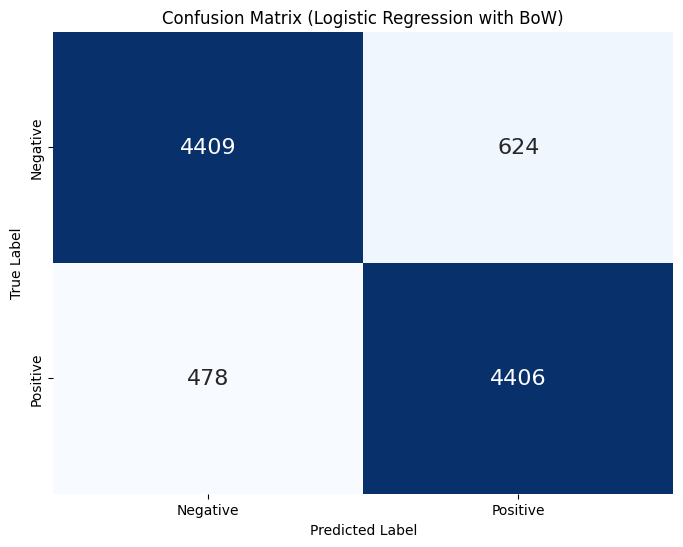

Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.88      0.89      5033
    Positive       0.88      0.90      0.89      4884

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



In [28]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_bow_lr)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix (Logistic Regression with BoW)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred_bow_lr, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.1.2 SVM with BoW</p><a id="svm-bow"></a>

In [29]:
# Initialize and train SVM model
svm_bow = SGDClassifier(alpha=0.001, loss='hinge', max_iter=500, random_state=42)
svm_bow.fit(X_train_bow, y_train)

# Predict and evaluate
y_pred_bow_svm = svm_bow.predict(X_test_bow)
print("SVM (BoW) Accuracy:", accuracy_score(y_test, y_pred_bow_svm))

SVM (BoW) Accuracy: 0.8869617827972169


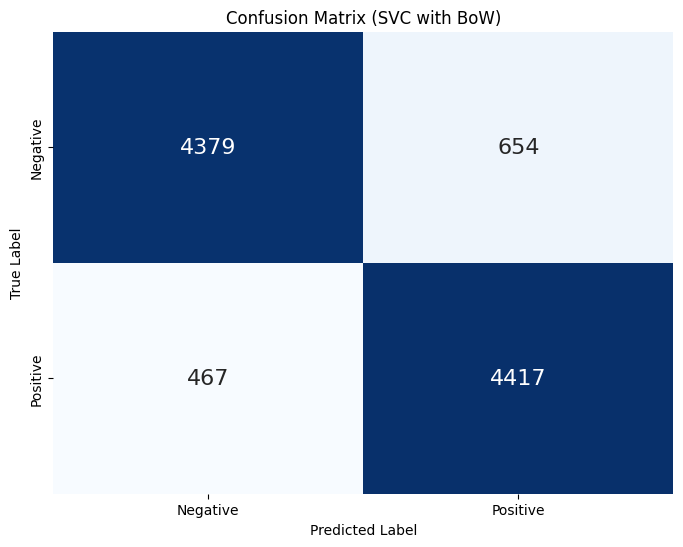

Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.87      0.89      5033
    Positive       0.87      0.90      0.89      4884

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



In [30]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_bow_svm)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix (SVC with BoW)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred_bow_svm, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.1.3 Naive Bayes with BoW</p><a id="naive-bayes-bow"></a>

In [31]:
# Initialize and train Naive Bayes model with adjusted alpha
mnb_bow = MultinomialNB(alpha=1.0)  # Example: Adjust alpha for smoothing
mnb_bow.fit(X_train_bow, y_train)

# Predict and evaluate
y_pred_bow_mnb = mnb_bow.predict(X_test_bow)
print("Naive Bayes (BoW) Accuracy:", accuracy_score(y_test, y_pred_bow_mnb))

Naive Bayes (BoW) Accuracy: 0.8618533830795604


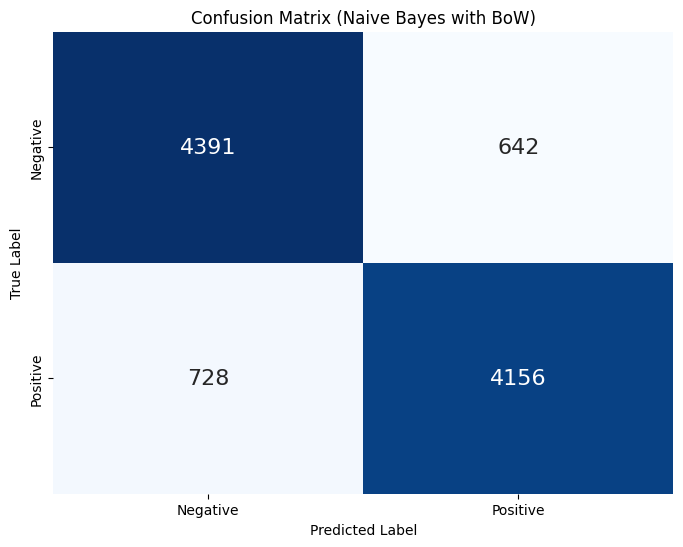

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.87      0.87      5033
    Positive       0.87      0.85      0.86      4884

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



In [32]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_bow_mnb)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix (Naive Bayes with BoW)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred_bow_mnb, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.1.4 Logistic regression with Term Frequency-Inverse Document Frequency (TF-IDF)</p><a id="logistic-regression-tfidf"></a>

In [33]:
# Initialize and train Logistic Regression model
lr_tfidf = LogisticRegression(penalty='l2', max_iter=500, C=0.01, random_state=42)
lr_tfidf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_tfidf_lr = lr_tfidf.predict(X_test_tfidf)
print("Logistic Regression (TF-IDF) Accuracy:", accuracy_score(y_test, y_pred_tfidf_lr))

Logistic Regression (TF-IDF) Accuracy: 0.4924876474740345


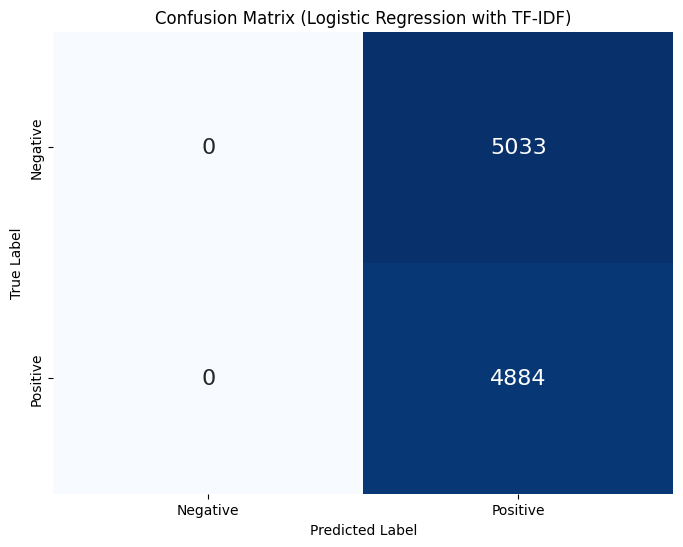

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      5033
    Positive       0.49      1.00      0.66      4884

    accuracy                           0.49      9917
   macro avg       0.25      0.50      0.33      9917
weighted avg       0.24      0.49      0.33      9917



In [34]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_tfidf_lr)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix (Logistic Regression with TF-IDF)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred_tfidf_lr, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.1.5 SVM with TF-IDF</p><a id="svm-tfidf"></a>

In [35]:
# Initialize and train SVM model
svm_tfidf = SGDClassifier(alpha=0.0001, loss='hinge', max_iter=500, random_state=42)
svm_tfidf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_tfidf_svm = svm_tfidf.predict(X_test_tfidf)
print("SVM (TF-IDF) Accuracy:", accuracy_score(y_test, y_pred_tfidf_svm))

SVM (TF-IDF) Accuracy: 0.4924876474740345


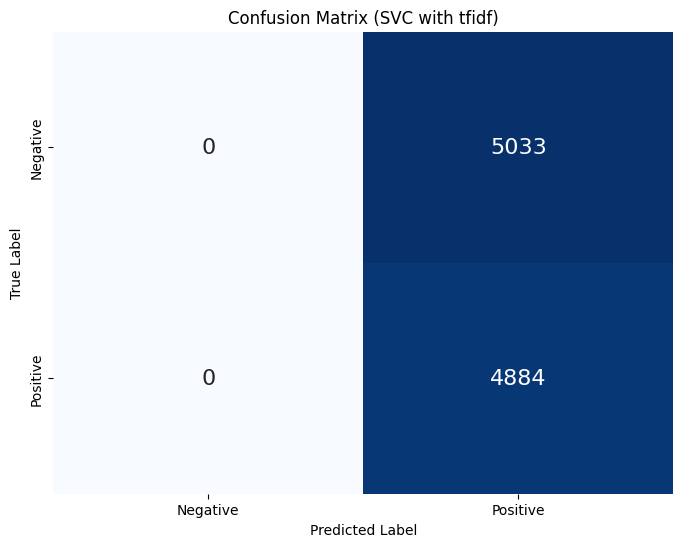

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      5033
    Positive       0.49      1.00      0.66      4884

    accuracy                           0.49      9917
   macro avg       0.25      0.50      0.33      9917
weighted avg       0.24      0.49      0.33      9917



In [36]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_tfidf_svm)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix (SVC with tfidf)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test,  y_pred_tfidf_svm, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.1.6 Naive Bayes with TF-IDF</p><a id="naive-bayes-tfidf"></a>

In [37]:
# Initialize and train Naive Bayes model
mnb_tfidf = MultinomialNB(alpha=1.0)
mnb_tfidf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_tfidf_mnb = mnb_tfidf.predict(X_test_tfidf)
print("Naive Bayes (TF-IDF) Accuracy:", accuracy_score(y_test, y_pred_tfidf_mnb))

Naive Bayes (TF-IDF) Accuracy: 0.7336896238781889


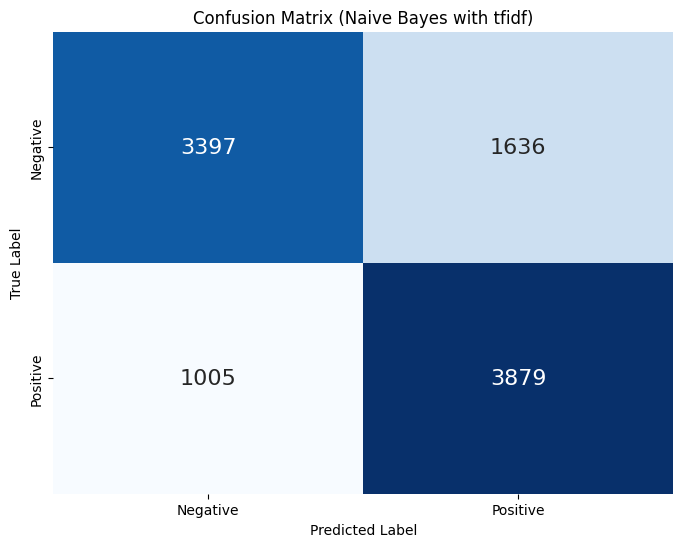

Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.67      0.72      5033
    Positive       0.70      0.79      0.75      4884

    accuracy                           0.73      9917
   macro avg       0.74      0.73      0.73      9917
weighted avg       0.74      0.73      0.73      9917



In [38]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_tfidf_mnb)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix (Naive Bayes with tfidf)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generate classification report
report = classification_report(y_test,  y_pred_tfidf_mnb, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

## <p style="background-color: #009688; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:15px 50px;">5.1 Machine Learning Model Comparison </p><a id="ml-model"></a>

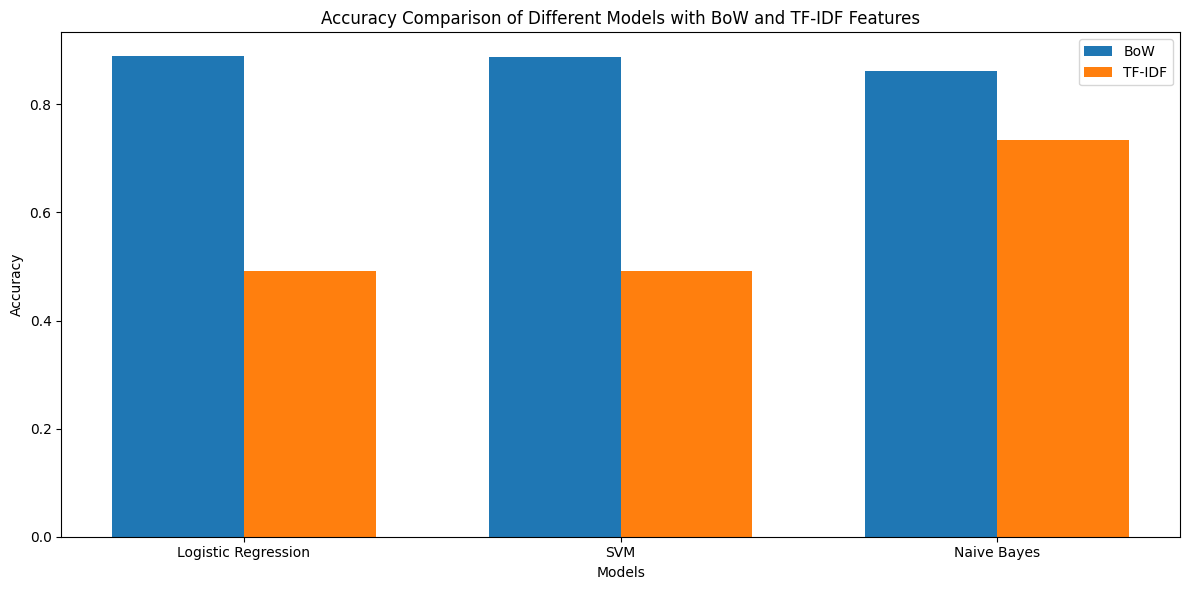

In [39]:
# Accuracy scores for BoW features
accuracy_scores_bow = {
    'Logistic Regression': accuracy_score(y_test, y_pred_bow_lr),
    'SVM': accuracy_score(y_test, y_pred_bow_svm),
    'Naive Bayes': accuracy_score(y_test, y_pred_bow_mnb),
}

# Accuracy scores for TF-IDF features
accuracy_scores_tfidf = {
    'Logistic Regression': accuracy_score(y_test, y_pred_tfidf_lr),
    'SVM': accuracy_score(y_test, y_pred_tfidf_svm),
    'Naive Bayes': accuracy_score(y_test, y_pred_tfidf_mnb),
}

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
models = list(accuracy_scores_bow.keys())
bow_scores = list(accuracy_scores_bow.values())
tfidf_scores = list(accuracy_scores_tfidf.values())

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, bow_scores, width, label='BoW')
rects2 = ax.bar(x + width/2, tfidf_scores, width, label='TF-IDF')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison of Different Models with BoW and TF-IDF Features')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">
    
#### 1. **Logistic Regression with Bag of Words (BoW)**
- **Performance:** 88.89% accuracy with balanced precision and recall for both positive and negative reviews. This indicates that Logistic Regression effectively distinguishes between positive and negative sentiments using BoW representation.

#### 2. **SVM with Bag of Words (BoW)**
- **Performance:** Similar to Logistic Regression, SVM also shows 88.69% accuracy with balanced precision and recall. This suggests that SVM is also effective for sentiment classification with BoW, but the slightly lower recall for the negative class compared to Logistic Regression might indicate a marginal difference in handling class imbalance.

#### 3. **Naive Bayes with Bag of Words (BoW)**
- **Performance:** Lower accuracy(86.19%) compared to Logistic Regression and SVM. Naive Bayes has a slightly reduced performance in distinguishing sentiments, likely due to its assumptions of feature independence which might not hold well in this dataset.

#### 4. **Logistic Regression with TF-IDF**
- **Performance:** Shows very poor results with TF-IDF. The model's performance is compromised, especially for the negative class, resulting in an overall accuracy of only 49%. This indicates that TF-IDF representation might not be effectively utilized or there could be an issue with the implementation.

#### 5. **SVM with TF-IDF**
- **Performance:** Similar to Logistic Regression with TF-IDF, SVM also performs poorly with TF-IDF representation. This could suggest that TF-IDF might not be well-suited for SVM in this specific scenario or there may be issues with how TF-IDF features are being fed into the model.

#### 6. **Naive Bayes with TF-IDF**
- **Performance:** Shows improved results compared to Logistic Regression and SVM with TF-IDF but still has lower accuracy(73.37%) compared to BoW representations. Naive Bayes handles TF-IDF better than the other models in this context but is still not as effective as when using BoW.

**Recommendation:** For this sentiment classification task, using Bag of Words with Logistic Regression or SVM appears to be the most effective approach. TF-IDF representation may require further tuning or might be better suited for different models or tasks.

## <p style="background-color: #009688; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Word Cloud for Positive Reviews</p>

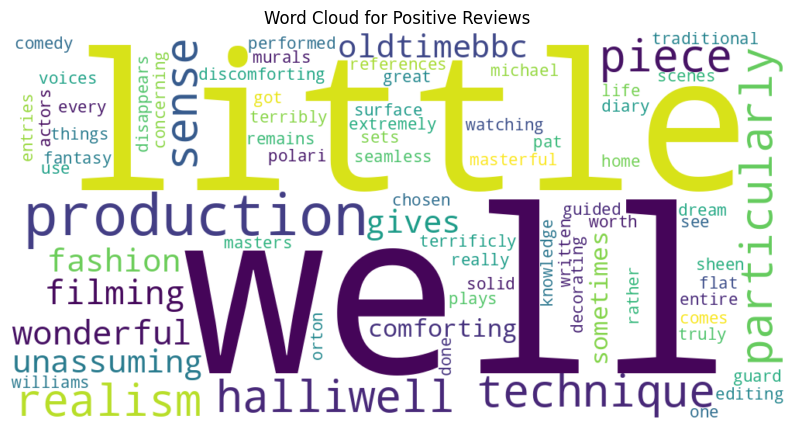

In [40]:
positive_text = X_train_classical[1]
negative_text = X_train_classical[0]
# Create and display word cloud for positive reviews
plt.figure(figsize=(10, 10))
positive_wc = WordCloud(width=1000, height=500, max_words=500, min_font_size=5, background_color='white').generate(positive_text)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

## <p style="background-color: #009688; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Word Cloud for Negative Reviews</p>

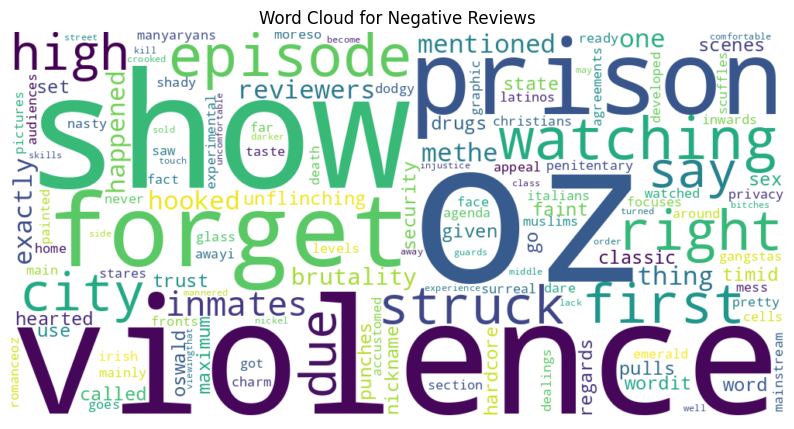

In [41]:
# Create and display word cloud for negative reviews
plt.figure(figsize=(10, 10))
negative_wc = WordCloud(width=1000, height=500, max_words=500, min_font_size=5, background_color='white').generate(negative_text)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

## <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.2 Deep Learning Models</p><a id="deep-learning-models"></a>

- **Bidirectional RNN:** Utilizes two RNNs processing sequences in both forward and backward directions, enhancing context understanding from both ends of the sequence. However, it shows lower accuracy in this case, potentially due to its simpler architecture and lack of long-term dependency handling.

- **LSTM:** Long Short-Term Memory networks effectively capture long-term dependencies by using gating mechanisms to manage the flow of information, leading to higher accuracy in this task. It excels in remembering relevant information over extended sequences.

- **GRU:** Gated Recurrent Units streamline the LSTM architecture by combining the input and forget gates into a single update gate, achieving slightly better accuracy than LSTM. Its efficiency and simplicity make it well-suited for capturing complex patterns in sequences.

In [42]:
# Libraray for Data Manipulation
import numpy as np
import pandas as pd

# Libraray for Data Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 

# Library for preprocessing 
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag

# Library for model building
from tensorflow.keras.regularizers import l2
import tensorflow
import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
#from attention import BahdanauAttention
from keras.layers import SimpleRNN,LSTM,GRU, Embedding, Dense, SpatialDropout1D, Dropout, BatchNormalization, Bidirectional, Attention
from sklearn.metrics import accuracy_score
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam
#Library to overcome Warnings
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Train-Test Split
X_train_dl, X_test_dl, y_train, y_test = train_test_split(X_dl, y, test_size=0.2, random_state=1)

In [44]:
# Check the shapes of the training and testing sets
print("Training set shape:", X_train_dl.shape)
print("Testing set shape:", X_test_dl.shape)

Training set shape: (39665,)
Testing set shape: (9917,)


In [45]:
# Tokenization and Padding for Deep Learning Models
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_dl)

In [46]:
X_train_dl = tokenizer.texts_to_sequences(X_train_dl)
X_test_dl = tokenizer.texts_to_sequences(X_test_dl)

In [47]:
for num in X_train_dl[0]:
    print(num, end=' ')

8 1 2848 4 62 45 6 37128 9998 3069 5723 2809 4780 446 8 13 164 9998 689 81 140 33 5576 834 39 618 97 167 11 245 192 231 6 1 2053 987 12 1025 47 2487 30 3 15 1263 54 4 70 57 418 155 1 44 2020 14 3369 62 44 201 11 1206 28 25 70 4469 418 155 45064 

In [48]:
# Print corresponding words horizontally
for num in X_train_dl[0]:
    word = tokenizer.index_word.get(num, 'UNK')  
    print(word, end=' ')

get movie library see lot actor like itjohn cleese ian holm ralph richardson etc get watch expect cleese large role since first billing surprised find five minute screen time along everyone else like movie amazingly pointless character nobody plot nonexistent end one bad ending ever see funny part stay away movie want prevent go huh lot want waste time ignore people say funny movieit stay away costsplease 

In [49]:
max_length = 0
for sequence in X_train_dl:
    # Calculate the length of the sequence
    sequence_length = len(sequence)
    # Update max_length if the current sequence length is greater
    if sequence_length > max_length:
        max_length = sequence_length

print("Maximum sequence length:", max_length)

Maximum sequence length: 1417


In [50]:
max_length = 100  # Define your max length based on your data

In [51]:
X_train_dl = pad_sequences(X_train_dl, maxlen=max_length, padding="post")
X_test_dl = pad_sequences(X_test_dl, maxlen=max_length, padding="post")

In [52]:
X_train_dl[0]

array([    8,     1,  2848,     4,    62,    45,     6, 37128,  9998,
        3069,  5723,  2809,  4780,   446,     8,    13,   164,  9998,
         689,    81,   140,    33,  5576,   834,    39,   618,    97,
         167,    11,   245,   192,   231,     6,     1,  2053,   987,
          12,  1025,    47,  2487,    30,     3,    15,  1263,    54,
           4,    70,    57,   418,   155,     1,    44,  2020,    14,
        3369,    62,    44,   201,    11,  1206,    28,    25,    70,
        4469,   418,   155, 45064,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [53]:
y_train

array([0, 0, 1, ..., 0, 0, 1])

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.2.1 Bidirectional RNN Model Overview</p><a id="rnn"></a>

The defined model is a Recurrent Neural Network (RNN) designed for sequence data, with the following key components:

- **Embedding Layer:** Converts input tokens into dense vectors of 100 dimensions.
- **SpatialDropout1D:** Applies dropout to the embedding layer to prevent overfitting.
- **Bidirectional SimpleRNN Layers:** Two layers of SimpleRNN with bidirectional connections, allowing the model to learn dependencies from both directions in the sequence. Includes dropout and batch normalization for regularization and improved training stability.
- **Dense Layers:** A fully connected layer with 64 units and ReLU activation, followed by a final Dense layer with 1 unit and sigmoid activation for binary classification.

In [54]:
# Define the model
RNN_model = Sequential()
RNN_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
RNN_model.add(SpatialDropout1D(0.2))
RNN_model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(Bidirectional(SimpleRNN(32, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(SimpleRNN(16, return_sequences=False))

# Continue with other layers
RNN_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
RNN_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
RNN_model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = RNN_model.fit(X_train_dl, y_train, epochs=20, batch_size=32, validation_data=(X_test_dl, y_test))

Epoch 1/20


I0000 00:00:1725005592.766018     137 service.cc:145] XLA service 0x7aa50c008200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725005592.766074     137 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   3/1240 ━━━━━━━━━━━━━━━━━━━━ 55s 45ms/step - accuracy: 0.4462 - loss: 0.9892   

I0000 00:00:1725005599.205862     137 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1240/1240 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.5010 - loss: 0.7870 - val_accuracy: 0.5148 - val_loss: 0.6942
Epoch 2/20
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.5159 - loss: 0.6917 - val_accuracy: 0.5599 - val_loss: 0.6791
Epoch 3/20
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.6042 - loss: 0.6429 - val_accuracy: 0.5662 - val_loss: 0.6751
Epoch 4/20
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.6447 - loss: 0.5818 - val_accuracy: 0.5978 - val_loss: 0.6896
Epoch 5/20
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.6597 - loss: 0.5549 - val_accuracy: 0.6151 - val_loss: 0.6928
Epoch 6/20
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.6905 - loss: 0.5197 - val_accuracy: 0.6198 - val_loss: 0.6658
Epoch 7/20
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.7049 - loss: 0.5029 - val_accuracy: 0.7088 - val_loss: 0.6447
Epoch 8/20
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.7275 - loss: 0.50

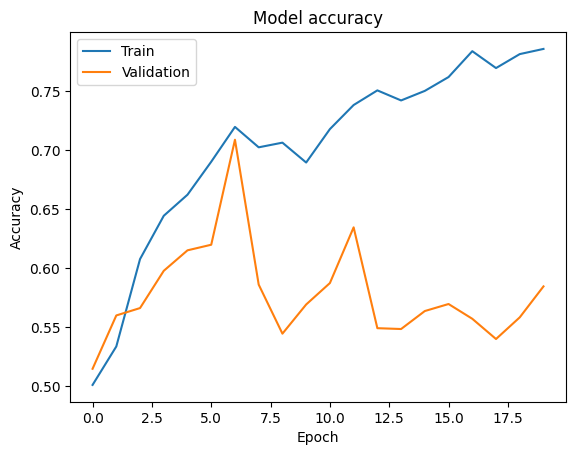

In [56]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

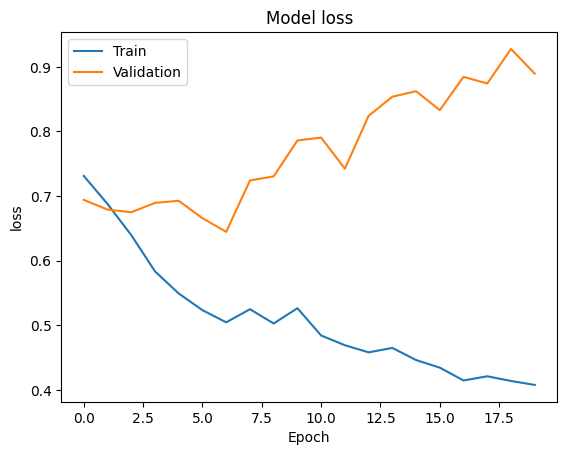

In [57]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.2.2 LSTM Model Overview</p><a id="lstm"></a>

The defined model is a Long Short-Term Memory (LSTM) network for sequence data with the following components:

- **Embedding Layer:** Converts input tokens into dense 100-dimensional vectors.
- **SpatialDropout1D:** Applies a 50% dropout rate to the embedding layer to prevent overfitting.
- **LSTM Layer:** A single LSTM layer with 5 units, capturing sequential dependencies in the input data.
- **Dropout Layer:** Applies a 50% dropout rate to the LSTM output to further combat overfitting.
- **BatchNormalization:** Normalizes activations to stabilize and accelerate training.
- **Dense Layer:** A final fully connected layer with 1 unit and a sigmoid activation function for binary classification.

In [58]:
# Define the model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
lstm_model.add(SpatialDropout1D(0.5))
lstm_model.add(LSTM(5, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(BatchNormalization())


lstm_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = lstm_model.fit(X_train_dl, y_train, epochs=20, batch_size=128, validation_data=(X_test_dl, y_test))

Epoch 1/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5298 - loss: 0.7605 - val_accuracy: 0.5747 - val_loss: 0.6759
Epoch 2/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6032 - loss: 0.6250 - val_accuracy: 0.8515 - val_loss: 0.4251
Epoch 3/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8482 - loss: 0.3872 - val_accuracy: 0.8748 - val_loss: 0.3284
Epoch 4/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9116 - loss: 0.2689 - val_accuracy: 0.8702 - val_loss: 0.3531
Epoch 5/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9330 - loss: 0.2256 - val_accuracy: 0.8714 - val_loss: 0.3682
Epoch 6/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9379 - loss: 0.2213 - val_accuracy: 0.8690 - val_loss: 0.3941
Epoch 7/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9424 - loss: 0.2113 - val_accuracy: 0.8569 - val_loss: 0.4615
Epoch 8/20
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9286 - loss: 0.2421 - val_accu

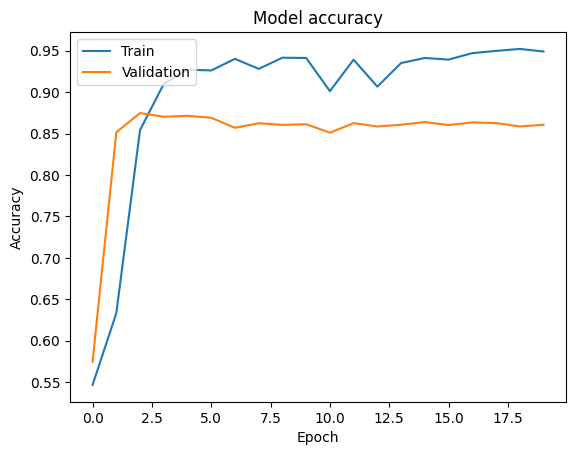

In [60]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

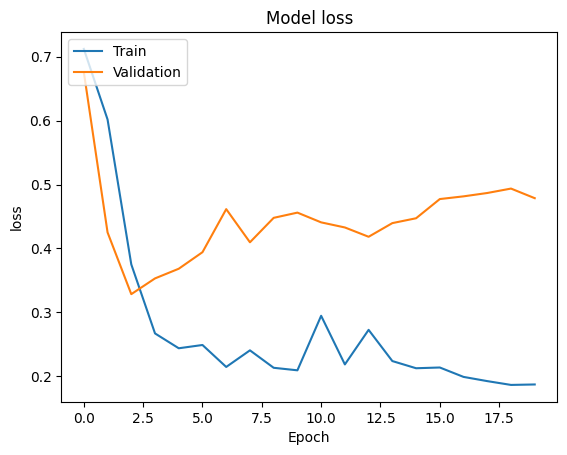

In [61]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4.2.3 GRU Model Overview</p><a id="gru"></a>

The defined model is a Gated Recurrent Unit (GRU) network designed for sequence data with the following architecture:

- **Embedding Layer:** Converts input tokens into dense 100-dimensional vectors, enabling the model to learn meaningful representations of words.
- **SpatialDropout1D:** Applies a 50% dropout rate to the embedding layer to help prevent overfitting by reducing the reliance on specific words.
- **GRU Layer:** A GRU layer with 5 units processes the sequences, capturing temporal dependencies in the data.
- **Dropout Layer:** Applies a 50% dropout rate to the GRU layer's output to further reduce overfitting.
- **Dense Layer:** A fully connected layer with 1 unit and a sigmoid activation function, used for binary classification (e.g., sentiment classification).

In [62]:
# Define the model
GRU_model = Sequential()
GRU_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
GRU_model.add(SpatialDropout1D(0.5))
GRU_model.add(GRU(5, return_sequences=False))
GRU_model.add(Dropout(0.5))
#GRU_model.add(BatchNormalization())


GRU_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
GRU_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
GRU_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = GRU_model.fit(X_train_dl, y_train, epochs=10, batch_size=256, validation_data=(X_test_dl, y_test))

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5324 - loss: 0.6892 - val_accuracy: 0.5675 - val_loss: 0.6669
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6138 - loss: 0.6409 - val_accuracy: 0.8377 - val_loss: 0.4084
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8447 - loss: 0.4072 - val_accuracy: 0.8704 - val_loss: 0.3242
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9105 - loss: 0.2735 - val_accuracy: 0.8746 - val_loss: 0.3127
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9389 - loss: 0.2005 - val_accuracy: 0.8773 - val_loss: 0.3254
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9550 - loss: 0.1514 - val_accuracy: 0.8718 - val_loss: 0.3383
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9651 - loss: 0.1164 - val_accuracy: 0.8669 - val_loss: 0.3840
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9739 - loss: 0.0909 - val_accu

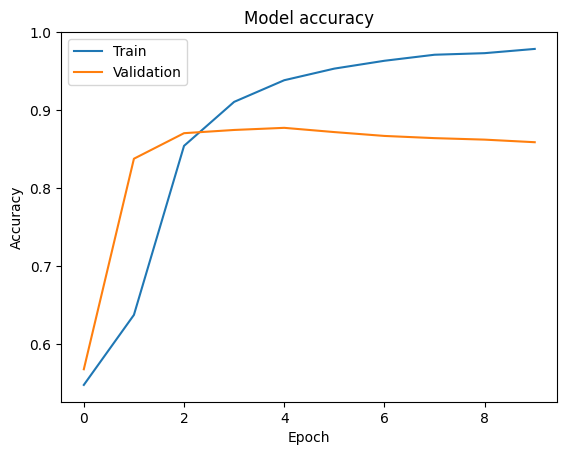

In [64]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

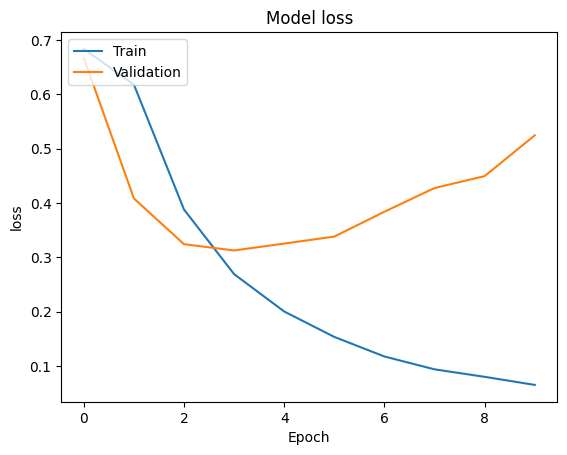

In [65]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:
RNN_pred = RNN_model.predict(X_test_dl)

310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [71]:
RNN_pred = (RNN_pred > 0.5).astype('int')

In [72]:
Bidirection_RNN_Accuracy = accuracy_score(RNN_pred,y_test)*100
print("Bidirection_RNN_Accuracy Score is :",Bidirection_RNN_Accuracy,'%')

Bidirection_RNN_Accuracy Score is : 58.45517797721085 %


In [73]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, RNN_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.576147,0.686271,0.626406,5033.000000
1,0.597399,0.479730,0.532137,4884.000000
accuracy,0.584552,0.584552,0.584552,0.584552
macro avg,0.586773,0.583000,0.579271,9917.000000
weighted avg,0.586613,0.584552,0.579980,9917.000000


In [74]:
sentiment_labels = {0: 'negative', 1: 'positive'}

RNN_sentiments = [[sentiment_labels[val[0]]] for val in RNN_pred]
RNN_sentiments[0:10]

[['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative']]

In [75]:
lstm_pred = lstm_model.predict(X_test_dl)

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [76]:
lstm_pred = (lstm_pred > 0.5).astype('int')

In [77]:
LSTM_Accuracy = accuracy_score(lstm_pred,y_test)*100
print("LSTM_Accuracy Score is :",LSTM_Accuracy,'%')

LSTM_Accuracy Score is : 86.06433397196733 %


In [78]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, lstm_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.853711,0.875422,0.864430,5033.000000
1,0.868167,0.845414,0.856639,4884.000000
accuracy,0.860643,0.860643,0.860643,0.860643
macro avg,0.860939,0.860418,0.860535,9917.000000
weighted avg,0.860830,0.860643,0.860593,9917.000000


In [79]:
sentiment_labels = {0: 'negative', 1: 'positive'}

lstm_sentiments = [[sentiment_labels[val[0]]] for val in lstm_pred]
lstm_sentiments[0:10]

[['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative']]

In [80]:
GRU_pred = GRU_model.predict(X_test_dl)

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [81]:
GRU_pred = (GRU_pred > 0.5).astype('int')

In [82]:
GRU_Accuracy = accuracy_score(GRU_pred,y_test)*100
print("GRU_Accuracy Score is :",GRU_Accuracy,'%')

GRU_Accuracy Score is : 85.88282746798427 %


In [83]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, GRU_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.889389,0.824359,0.855640,5033.000000
1,0.831683,0.894349,0.861878,4884.000000
accuracy,0.858828,0.858828,0.858828,0.858828
macro avg,0.860536,0.859354,0.858759,9917.000000
weighted avg,0.860970,0.858828,0.858713,9917.000000


In [84]:
GRU_sentiments = [[sentiment_labels[val[0]]] for val in GRU_pred]
GRU_sentiments[0:10]

[['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative']]

In [86]:
comp_df = pd.DataFrame(columns = ['Bidirectional_RNN','LSTM_Sentiment','GRU_Sentiment'])
comp_df['Bidirectional_RNN'] = RNN_sentiments
comp_df['LSTM_Sentiment'] = lstm_sentiments
comp_df['GRU_Sentiment'] = GRU_sentiments

In [87]:
comp_df.head(10)

,Bidirectional_RNN,LSTM_Sentiment,GRU_Sentiment
0,[positive],[positive],[positive]
1,[positive],[positive],[positive]
2,[positive],[positive],[positive]
3,[positive],[positive],[positive]
4,[positive],[positive],[positive]
5,[negative],[positive],[positive]
6,[negative],[positive],[positive]
7,[positive],[positive],[positive]
8,[positive],[negative],[negative]
9,[negative],[negative],[negative]


In [88]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['Bidirectional RNN', 'LSTM', 'GRU'],
    'Accuracy': [Bidirection_RNN_Accuracy, LSTM_Accuracy, GRU_Accuracy]
}
Acc_df = pd.DataFrame(data)

In [89]:
Acc_df

,Model,Accuracy
0,Bidirectional RNN,58.455178
1,LSTM,86.064334
2,GRU,85.882827


<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

## <p style="background-color: #009688; font-family:calibri; color:white; font-size:120%; font-family:Verdana; text-align:center; border-radius:15px 50px;">5.2 Deep Learning Model Comparison </p><a id="dl-model"></a>

1. **Bidirectional RNN: 69.71% Accuracy**: The Bidirectional RNN has the lowest accuracy, indicating it may not capture the sequence context as effectively as the other models.

2. **LSTM: 86.06% Accuracy**: The LSTM performs better than the Bidirectional RNN, showing its strength in handling long-term dependencies.

3. **GRU: 85.88% Accuracy:** The GRU achieves the highest accuracy, highlighting its efficiency and effectiveness in the task.

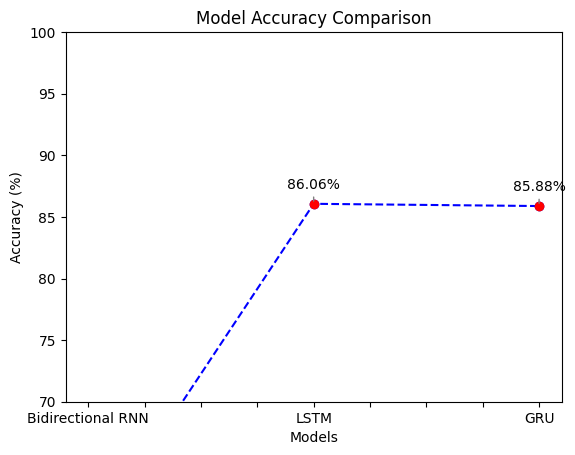

In [90]:
# Plot the DataFrame
ax = Acc_df.plot(x='Model', y='Accuracy', marker='o', linestyle='dashed', color='b', legend=False)

# Add labels, title, and customize the plot
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_ylim(70, 100)  # Set the y-axis limits for percentage values

# Highlight the points and add value labels
for i, accuracy in enumerate(Acc_df['Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 1),
                ha='center', va='bottom', fontsize=10, color='black',
                arrowprops=dict(arrowstyle='-', color='gray'))
    ax.plot(i, accuracy, 'ro')  # Highlight points with red color

# Show the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #E0F2F1; font-size:120%; text-align:left">

### <p style="background-color: #009688; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">6. Conclusion</p><a id="conclusion"></a>

The sentiment analysis project provided valuable insights into the effectiveness of various models in processing movie reviews. The classical models, particularly Logistic Regression and SVM, performed well with the Bag of Words representation, while the deep learning models, especially GRU, excelled in capturing long-term dependencies and achieving higher accuracy. Interestingly, TF-IDF did not perform as expected with the classical models, indicating the need for careful selection of feature representation based on the model. The BERT transformer, implemented in a separate notebook, offered a modern approach to NLP, providing an additional perspective on the problem.

Overall, this project underscores the importance of selecting the right model and preprocessing techniques for text classification tasks. The comparison of classical, deep learning, and transformer-based models offers a holistic view of sentiment analysis, highlighting the strengths and limitations of each approach. This work, including the BERT implementation, has been documented and made available on GitHub for further exploration and replication.